Imports:

In [52]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
from shapely.geometry import Polygon, Point 
import folium.colormap as cm

Load data with new timestamps:

In [53]:
crimes = pd.read_pickle('crime_chicago_with_better_timestamp.pkl')

This is what a record of crime looks like:

In [55]:
crimes.head(1)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,datetime
0,10361459,HY553232,12/28/2015 11:39:00 PM,025XX S STEWART AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,34,18,50629,72523,2015,01/04/2016 04:02:14 PM,41.845652,-87.636561,"(41.845652363, -87.636561415)",2015-12-28 23:39:00


# New columns - timestamp parts

In [56]:
crimes['day_of_week'] = crimes['datetime'].dt.dayofweek #day of week as integer from interval [0,6]

In [57]:
crimes['day_of_year'] = crimes['datetime'].dt.dayofyear #day of year as integer from interval [1,366]

In [70]:
crimes['week'] = crimes['datetime'].dt.week #week of year integer from interval [1,53]

In [58]:
crimes['month'] = crimes['datetime'].dt.month #month of year as integer from interval [1,12]

In [61]:
crimes['hour'] = crimes['datetime'].dt.hour #hour of day as integer from interval [0,23]

In [71]:
crimes.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Updated On,Latitude,Longitude,Location,datetime,day_of_week,day_of_year,month,hour,week
0,10361459,HY553232,12/28/2015 11:39:00 PM,025XX S STEWART AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,...,01/04/2016 04:02:14 PM,41.845652,-87.636561,"(41.845652363, -87.636561415)",2015-12-28 23:39:00,0,362,12,23,53
1,10361538,HY553215,12/28/2015 11:38:00 PM,001XX E 46TH ST,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,01/04/2016 04:02:14 PM,41.811108,-87.622315,"(41.811108036, -87.622314691)",2015-12-28 23:38:00,0,362,12,23,53


# Analysis

## Monthly crimes

In this part we look at the number of crimes over different months. The maximum numbers occur during the summer, which may be explained by higher temperatures or the fact that people have more free time.

In [68]:
crimes_monthly = crimes.groupby(['month']).size().reset_index().rename(columns={0:'count'})
crimes_monthly

,month,count
0,1,453141
1,2,399827
2,3,484288
3,4,485339
4,5,521672
5,6,516660
6,7,544075
7,8,537452
8,9,505339
9,10,511273


Plot `month` at x-axis and `count` at y-axis, use bar plot:

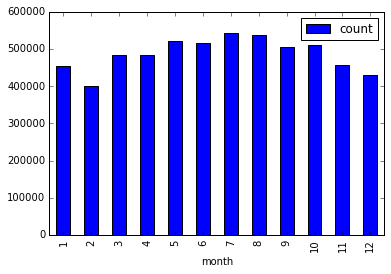

In [79]:
crimes_monthly.plot(x='month', y='count', kind = 'bar')

## Weekly crimes

## Daily crimes

## Hourly crimes

In this part we look at the number of crimes in different hours.The maximum occurs during the late evening and during the lunch time.

In [80]:
crimes_hourly = crimes.groupby(['hour']).size().reset_index().rename(columns={0:'count'})
crimes_hourly

,hour,count
0,0,323665
1,1,188136
2,2,157371
3,3,126430
4,4,93998
5,5,76766
6,6,89635
7,7,130765
8,8,195190
9,9,245406


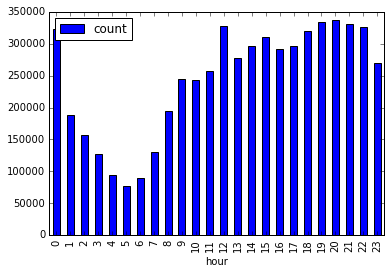

In [81]:
crimes_hourly.plot(x='hour', y='count', kind = 'bar')

## Crimes for every hour in a week

Here we explore the crimes by hour and day. The pattern of crimes repeats every day, but there are slight variations for each day. Sunday appears to be the most peaceful day, while Friday is probably the worst.

In [83]:
crimes_weekday_hour = crimes.groupby(['day_of_week', 'hour']).size().reset_index().rename(columns={0:'count'})
crimes_weekday_hour

,day_of_week,hour,count
0,0,0,45439
1,0,1,22947
2,0,2,18088
3,0,3,13934
4,0,4,10582
5,0,5,9745
6,0,6,12740
7,0,7,20450
8,0,8,31030
9,0,9,38079


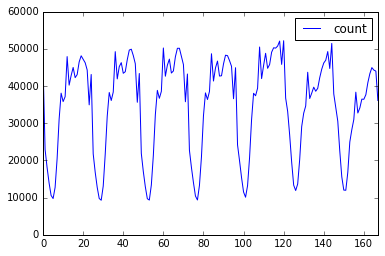

In [86]:
crimes_weekday_hour[['count']].plot()

We can see how Friday night differs from the rest of the week with higher number of counts between 7pm and midnight.  
Saturday and Sunday exhibit much lower activity in the morning rush hours and overall Sunday is the least criminal day of the week.

## Thefts for every hour in a week

First filter `crimes` to pick out thefts. Than group that by `day_of_week` and `hour`:

In [88]:
thefts_weekday_hour = crimes[crimes['Primary Type'] == 'THEFT']\
                        .groupby(['day_of_week', 'hour']).size().reset_index().rename(columns={0:'count'})
thefts_weekday_hour

,day_of_week,hour,count
0,0,0,10087
1,0,1,3208
2,0,2,2362
3,0,3,1990
4,0,4,1524
5,0,5,1843
6,0,6,2929
7,0,7,5061
8,0,8,7678
9,0,9,10450


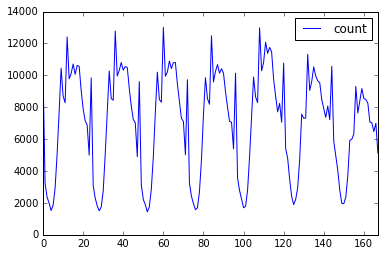

In [89]:
thefts_weekday_hour[['count']].plot()

## General guide

1. Filter `crimes` - optional
    - As in the last example, pick a column and test for (in)equality with a value
    - Multiple tests can be combined using `and` (&) or `or` (|), but every test must be enclosed in parentheses (round brackets)
    - All the rows satisfying the logical expression are returned
    - It's possible to use the function `select_locs` from `Brano-binning` notebook to get crimes from specified geographical rectangle
2. Group (filtered) `crimes`
    - Using `.groupby(['<column_name>']).size().reset_index().rename(columns={0:'count'})`
3. Plot

# Old stuff

In [39]:
crimes_daily = crimes.groupby(['datetime']).size().reset_index().rename(columns={0:'count'})

In [40]:
crimes_daily['day'] = crimes_daily['datetime'].dt.dayofweek

In [41]:
crimes_daily.index = pd.DatetimeIndex(crimes_daily['datetime'])

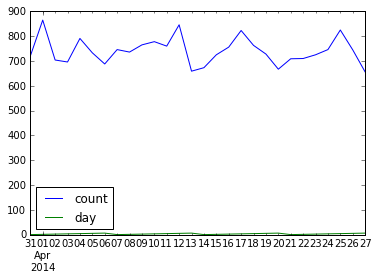

In [42]:
crimes_daily[(crimes_daily['datetime'] >= '2014-03-31') & (crimes_daily['datetime'] < '2014-04-28')].plot()

In [43]:
crimes_weekday = crimes.groupby(['day']).size().reset_index().rename(columns={0:'count'})

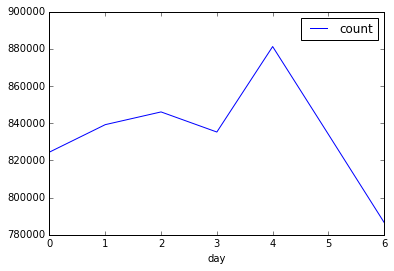

In [50]:
crimes_weekday.set_index('day').plot()

In [51]:
crimes_weekday.set_index('day')

,count
day,
0,824456
1,839220
2,846061
3,835258
4,881207
5,833953
6,786536


Without filtering:
{new_variable}` = crimes.groupby([`{column headers}`]).size().reset_index().rename(columns={0:'count'})`

With filtering:
{new_variable}` = crimes[crimes[`{column header}`] `{(in)equality test}` 'THEFT']\`
                       `.groupby([`{column headers}`]).size().reset_index().rename(columns={0:'count'})`